In [ ]:
#Import Required Libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
#Load Your Dataset
import pandas as pd
df = pd.read_csv('/content/sentiment-analysis.csv')
print(df.head())


  Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score
0  "I love this product!", Positive, Twitter, 202...                     
1  "The service was terrible.", Negative, Yelp Re...                     
2  "This movie is amazing!", Positive, IMDb, 2023...                     
3  "I'm so disappointed with their customer suppo...                     
4  "Just had the best meal of my life!", Positive...                     


In [ ]:
#Load and Inspect the Data
import pandas as pd

df = pd.read_csv('/content/sentiment-analysis.csv')
print(df.columns)
print(df.head())


Index(['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'], dtype='object')
  Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score
0  "I love this product!", Positive, Twitter, 202...                     
1  "The service was terrible.", Negative, Yelp Re...                     
2  "This movie is amazing!", Positive, IMDb, 2023...                     
3  "I'm so disappointed with their customer suppo...                     
4  "Just had the best meal of my life!", Positive...                     


In [ ]:
# Use sep=',' and engine='python'
import pandas as pd

df = pd.read_csv('/content/sentiment-analysis.csv', sep=',', engine='python', quotechar='"', skipinitialspace=True)

print(df.columns)
print(df.head())


Index(['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'], dtype='object')
  Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score
0  "I love this product!", Positive, Twitter, 202...                     
1  "The service was terrible.", Negative, Yelp Re...                     
2  "This movie is amazing!", Positive, IMDb, 2023...                     
3  "I'm so disappointed with their customer suppo...                     
4  "Just had the best meal of my life!", Positive...                     


In [ ]:
#manual check and fix
# Step 1: Manually open and read the file
with open('/content/sentiment-analysis.csv', 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Step 2: Print the first 5 lines
for i in range(5):
    print(lines[i])


"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"

"""I love this product!"", Positive, Twitter, 2023-06-15 09:23:14, @user123, New York, 0.85"

"""The service was terrible."", Negative, Yelp Reviews, 2023-06-15 11:45:32, user456, Los Angeles, 0.65"

"""This movie is amazing!"", Positive, IMDb, 2023-06-15 14:10:22, moviefan789, London, 0.92"

"""I'm so disappointed with their customer support."", Negative, Online Forum, 2023-06-15 17:35:11, forumuser1, Toronto, 0.78"



In [ ]:
#Manually split using .split(',') + fix quotes
import pandas as pd

data = []
with open('/content/sentiment-analysis.csv', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Loop through each line, strip and split
for line in lines:
    line = line.strip()
    # Split only on top-level commas (not inside quotes)
    fields = [x.strip().strip('"') for x in line.split(',')]
    data.append(fields)

# Manually check how many columns the first line gives
print("First row split into:", len(data[0]), "fields")
print("First row:", data[0])


First row split into: 7 fields
First row: ['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score']


In [ ]:
#fix column names and build DataFrame:
# Check if it's just one string — then split that too
if len(data[0]) == 1:
    header = data[0][0].split(', ')
    rows = [row[0].split(', ') for row in data[1:]]
else:
    header = data[0]
    rows = data[1:]

# Create DataFrame
df = pd.DataFrame(rows, columns=header)
print(df.head())


                                               Text Sentiment        Source  \
0                              I love this product!  Positive       Twitter   
1                         The service was terrible.  Negative  Yelp Reviews   
2                            This movie is amazing!  Positive          IMDb   
3  I'm so disappointed with their customer support.  Negative  Online Forum   
4                Just had the best meal of my life!  Positive   TripAdvisor   

             Date/Time      User ID     Location Confidence Score  
0  2023-06-15 09:23:14     @user123     New York             0.85  
1  2023-06-15 11:45:32      user456  Los Angeles             0.65  
2  2023-06-15 14:10:22  moviefan789       London             0.92  
3  2023-06-15 17:35:11   forumuser1      Toronto             0.78  
4  2023-06-16 08:50:59     foodie22        Paris             0.88  


In [ ]:
#Preprocess the Text Data
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"<.*?>", "", text)  # Remove HTML tags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphabetic characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply cleaning function to the 'Text' column
df['clean_review'] = df['Text'].apply(clean_text)


In [ ]:
#Encode Sentiment Labels
# Encode Sentiment: Positive -> 1, Negative -> 0
df['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0})


In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = df['clean_review']  # Feature (review text)
y = df['Sentiment']     # Target (sentiment)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
#Check for Missing Values in the Data:
# Check for NaN values in the target column
print(df['Sentiment'].isna().sum())  # Prints the number of missing values in the 'Sentiment' column


2


In [ ]:
#Remove Rows with NaN Values
# Remove rows with missing target values (NaN)
df = df.dropna(subset=['Sentiment'])

# Check again to make sure the issue is resolved
print(df['Sentiment'].isna().sum())


0


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [ ]:
#Proceed with the Model Training:
# Re-split the data after cleaning
X = df['clean_review']  # Feature
y = df['Sentiment']     # Target

# Split the data again after cleaning NaN values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reapply TF-IDF transformation
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the model
model.fit(X_train_tfidf, y_train)


LogisticRegression()

Accuracy: 0.95
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.93      0.97        15

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.94        20
weighted avg       0.96      0.95      0.95        20



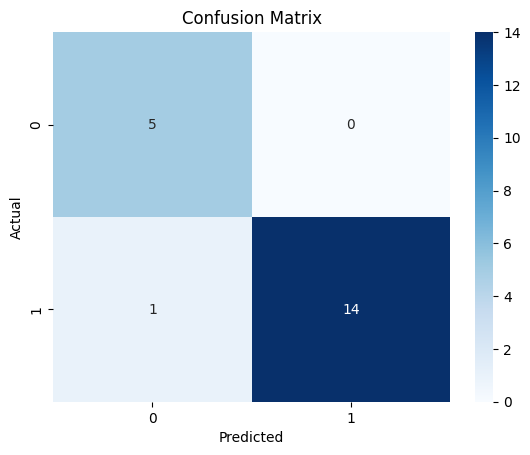

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import joblib

# Save the model and vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']